In [40]:
import tensorflow as tf
tf.compat.v1.keras.datasets.mnist.load_data
mnist = tf.keras.datasets.mnist.load_data(path='mnist.npz')

We know that each MNIST image is a 28 x 28 bitmap. Here is one line. At the edge, of course it is all 0.

The Tensorflow docs provide:

> Returns
> Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

> `x_train, x_test`: uint8 arrays of grayscale image data with shapes (num_samples, 28, 28).

> `y_train, y_test`: uint8 arrays of digit labels (integers in range 0-9) with shapes (num_samples,). 

In [41]:
len(mnist[0][0]), len(mnist[0][1]), len(mnist[1][0]), len(mnist[1][1])

(60000, 60000, 10000, 10000)

So, 60,000 training, 10,000 testing.

We know that they are 28x28 matrices. Let's take a look at one.

In [42]:
mnist[0][0][0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Oh, that is very hard to understand. Let's see one plotted.

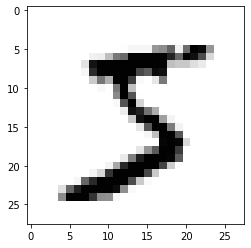

In [43]:
import matplotlib.pyplot as plt

plt.imshow(mnist[0][0][0], cmap="Greys", interpolation="nearest")
plt.show()

Apparently that is supposed to be a 5. Humans have such bad handwriting.

In [44]:
# A little cleanup before we go on
(x_train, y_train), (x_test, y_test) = mnist
x_train.shape

(60000, 28, 28)

In [45]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)


# change our image type to float32 data type
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0

print(x_test.shape)
print(x_train.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)


In [46]:
# Do one hot encoding on the labels:

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

num_classes=y_test.shape[1]
print(num_classes)

10


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

# create model
model = Sequential()

# Our First Convolution Layer, Filter size 32 which reduces our layer size to 26 x 26 x 32
# We use ReLU activation and specify our input_shape which is 28 x 28 x 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Our Second Convolution Layer, Filter size 64 which reduces our layer size to 24 x 24 x 64
model.add(Conv2D(64, (3, 3), activation='relu'))

# We use MaxPooling with a kernel size of 2 x 2, this reduces our size to 12 x 12 x 64
model.add(MaxPooling2D(pool_size=(2, 2)))

# We use a dropout P setting of 0.25 to reduce overfitting
model.add(Dropout(0.25))

# We then Flatten our tensor object before input into our Dense Layer
# A flatten operation on a tensor reshapes the tensor to have the shape that is 
# equal to the number of elements contained in tensor
# In our CNN it goes from 12 * 12 * 64 to 9216 * 1
model.add(Flatten())

# We connect this layer to a Fully Connected/Dense layer of size 1 * 128
model.add(Dense(128, activation='relu'))

# We use another Dropout layer
model.add(Dropout(0.5))

# We create our final Fully Connected/Dense layer with an output for each class (10)
model.add(Dense(num_classes, activation='softmax'))

# We compile our model, this creates an object that stores the model we just created
# We set our Optimizer to use Stochastic Gradient Descent (learning rate of 0.01)
# We set our loss function to be categorical_crossentropy as it's suitable for multiclass problems
# Finally, the metrics (What we judge our performance on) to be accuracy
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

# We can use the summary function to display our model layers and parameters
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [49]:
batch_size = 32
epochs = 10

# Store our results here so we can plot later
# In our fit function we specify our datsets (x_train & y_train), 
# the batch size (typically 16 to 128 depending on your RAM), the number of 
# epochs (usually 10 to 100) and our validation datasets (x_test & y_test)
# verbose = 1, sets our training to output performance metrics every epoch
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# We obtain our accuracy score using the evalute function
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1404 - accuracy: 0.9581 - val_loss: 0.0662 - val_accuracy: 0.9795
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1203 - accuracy: 0.9637 - val_loss: 0.0585 - val_accuracy: 0.9806
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1063 - accuracy: 0.9687 - val_loss: 0.0544 - val_accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1003 - accuracy: 0.9696 - val_loss: 0.0495 - val_accuracy: 0.9847
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0904 - accuracy: 0.9724 - val_loss: 0.0444 - val_accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0829 - accuracy: 0.9747 - val_loss: 0.0443 - val_accuracy: 0.9860
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0798 - accuracy: 0.9757 - val_loss: 0.0415 - val_ac

In [50]:
model.save("mnist_sample_cnn_10_epochs.h5")

7	3	0	3	5	

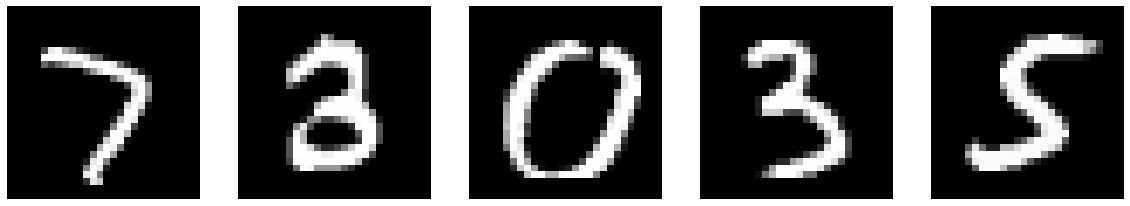

In [51]:
import numpy as np

figure = plt.figure(figsize=(20,20))

for i in range(5):
    figure.add_subplot(1,5,i+1)
    random_idx = np.random.randint(0,len(x_test))
    plt.imshow(x_test[random_idx,:,:,0],cmap="gray")
    plt.axis("off")
    print(np.squeeze(
        np.argmax(
            model.predict(
                x_test[random_idx].reshape(1,28,28,1)
            ),
            axis=1),
        axis=0),end="\t")